🧠 Titanic Clustering & Dimensionality Reduction in Jupyter Notebook (Split by Cell)

 Name: B. Manohar

Phone Number: 8074386315

Domain: AIML

In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [2]:
#Load the Dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#Data Cleaning
df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True)

# Handle missing values
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])


In [4]:
#Encode Categorical Features
label_encoders = {}
for col in ['Sex', 'Embarked']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


In [5]:
#Feature Scaling
features = df.drop(columns=['Survived'])  # exclude target variable for unsupervised learning
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


In [6]:
#K-Means Clustering
# Apply KMeans clustering with 2 clusters (we're trying to find hidden patterns, not labels)
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Add cluster labels to dataframe for reference
df['Cluster'] = clusters


In [7]:
#PCA for Dimensionality Reduction
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_features)

df['PCA1'] = pca_components[:, 0]
df['PCA2'] = pca_components[:, 1]


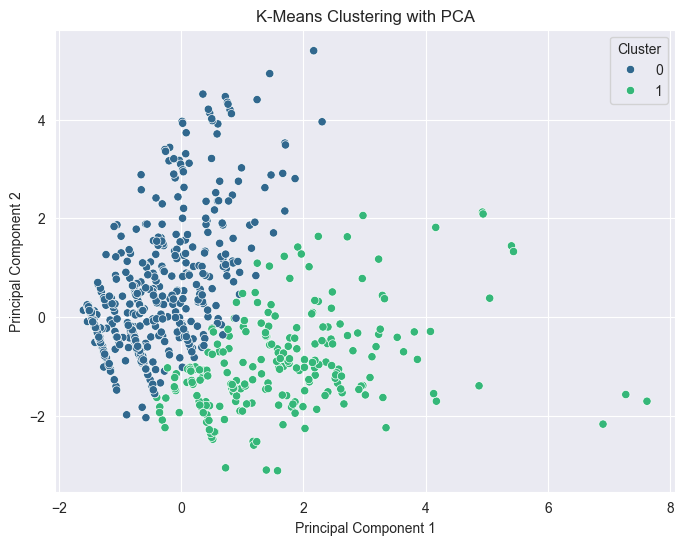

In [8]:
#Visualize Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='viridis')
plt.title('K-Means Clustering with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()


✅ Conclusion

In this task, we applied unsupervised machine learning techniques—namely K-Means Clustering and Principal Component Analysis (PCA)—to explore hidden patterns in the Titanic dataset without using the survival labels (Survived).